In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def read_results(dirname):
    return np.load(dirname+"/chains.npy"), np.load(dirname+"/lnprobabilities.npy")

In [68]:
chain, lnprob = read_results("results1")

In [30]:
chain.shape

(20, 10000, 2)

In [29]:
np.swapaxes(chain, 0, 1).shape

(10000, 20, 2)

In [20]:
chain.reshape(-1, chain.shape[2]).shape

(200000, 2)

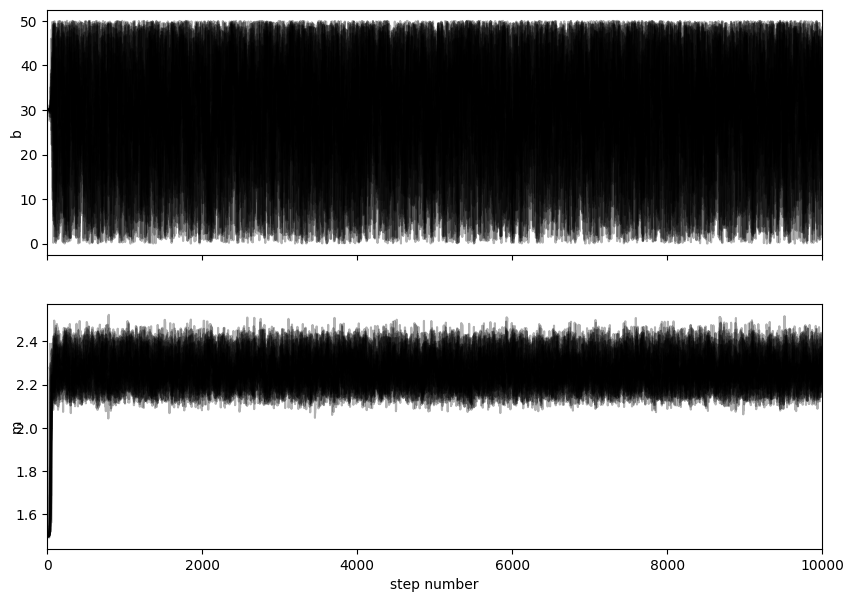

In [32]:
ndim = 2
samples = np.swapaxes(chain, 0, 1)

fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
labels = ["b", "m"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.03, 0.5)

axes[-1].set_xlabel("step number");

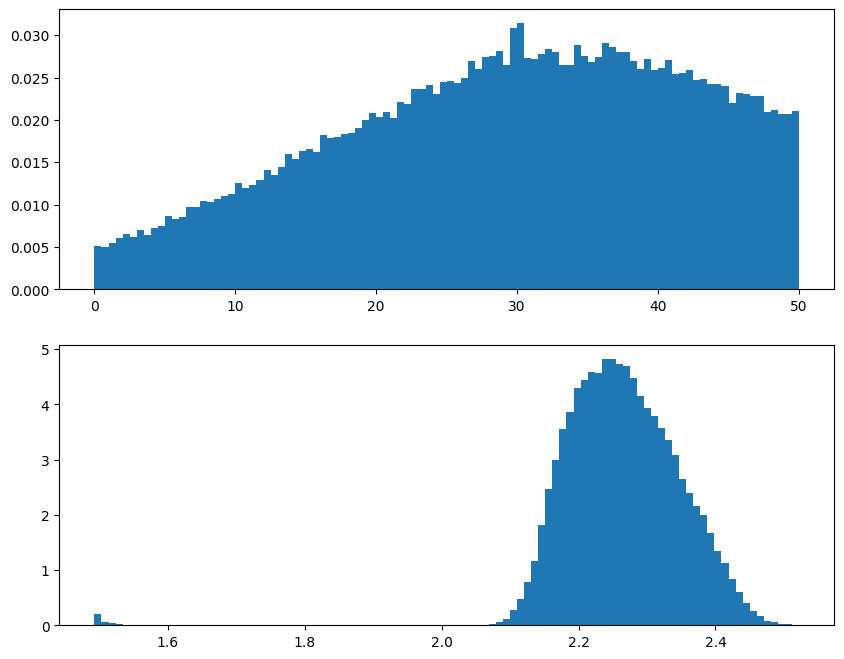

In [97]:
samples = np.swapaxes(chain, 0, 1).reshape(-1, chain.shape[2])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(2,1,1)
plt.hist(samples[:,0], density = True, bins = 100);
ax = fig.add_subplot(2,1,2)
plt.hist(samples[:,1], density = True, bins = 100);

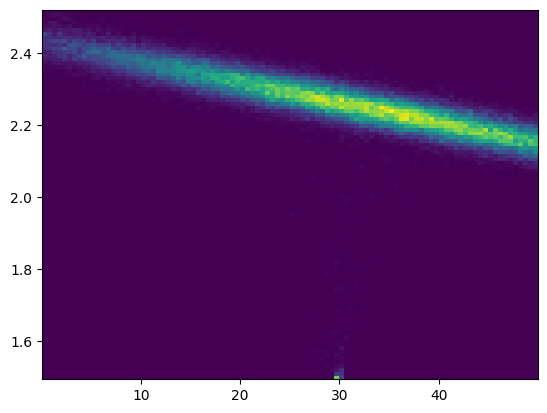

In [35]:
counts, xbins, ybins, image = plt.hist2d(samples[:,0],
                                         samples[:,1],
                                         bins = 100)

b + m x = (29.391628 +/- 12.366454) + (2.263221 +/- 0.090473) x


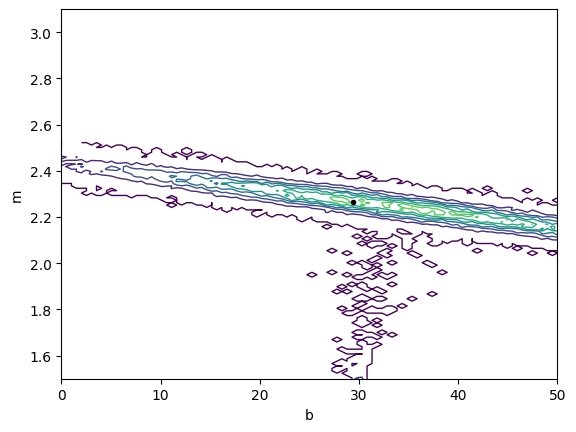

In [38]:

plt.contour(counts.T, extent = [xbins.min(), xbins.max(), ybins.min(), ybins.max()], linewidths = 1)
plt.xlabel("b"); plt.ylabel("m")
plt.xlim(0, 50);
plt.ylim(1.5, 3.1);
plt.plot(np.mean(samples[:,0]), np.mean(samples[:,1]), '.k')
print("b + m x = (%f +/- %f) + (%f +/- %f) x" % (np.mean(samples[:,0]), np.std(samples[:,0]),
                                                 np.mean(samples[:,1]), np.std(samples[:,1])))

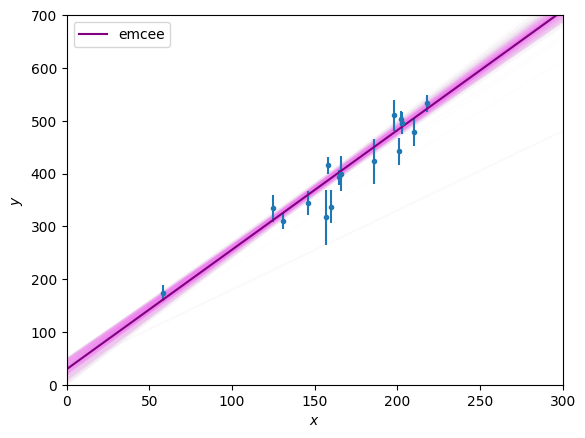

In [39]:
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])

X = np.array([203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146], dtype = float)
Y = np.array([495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344], dtype = float)
sigma_Y = np.array([21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22], dtype = float)

for i in np.random.randint(len(samples), size=500):
  y = A @ np.array([samples[i,0], samples[i,1]])
  plt.plot(x, y, color = 'violet', alpha = 0.01);

plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

y = A @ np.array([np.mean(samples[:,0]), np.mean(samples[:,1])])
plt.plot(x, y, color='purple', label="emcee");

plt.legend();

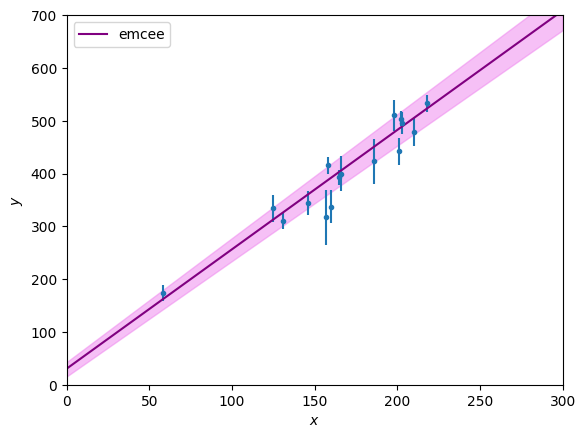

In [65]:
x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])

B = samples[:,0]
M = samples[:,1]

y84 = y = A @ np.array([np.percentile(B, 84.), np.percentile(M, 84.)])
y16 = y = A @ np.array([np.percentile(B, 16.), np.percentile(M, 16.)])
plt.fill_between(x, y16, y84, color = 'violet', alpha = 0.5)

X = np.array([203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146], dtype = float)
Y = np.array([495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344], dtype = float)
sigma_Y = np.array([21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22], dtype = float)

# for i in np.random.randint(len(samples), size=500):
#   y = A @ np.array([samples[i,0], samples[i,1]])
#   plt.plot(x, y, color = 'violet', alpha = 0.01);

plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

y = A @ np.array([np.percentile(B, 50.), np.percentile(M, 50.)])
plt.plot(x, y, color='purple', label="emcee");

plt.legend();

In [ ]:
lnprob

array([-335.52992284, -335.52992284, -335.50905195, ...,   -9.56546415,
         -9.84398945,   -9.6446234 ])

In [98]:
row, col = np.unravel_index(np.argmax(lnprob), lnprob.shape)
chain[row, col]

array([34.01075293,  2.24016709])

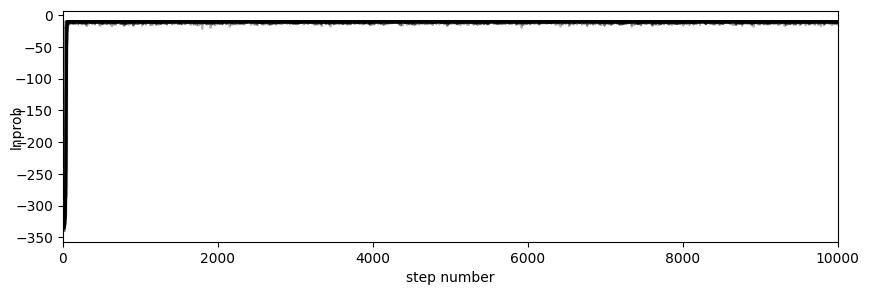

In [96]:
ndim = 1
samples = np.swapaxes(lnprob, 0, 1)

fig, ax = plt.subplots(1, figsize=(10, 3), sharex=True)

ax.plot(samples[:, :], "k", alpha=0.3)
ax.set_xlim(0, len(samples))
ax.set_ylabel("lnprob")
ax.yaxis.set_label_coords(-0.05, 0.5)

ax.set_xlabel("step number");

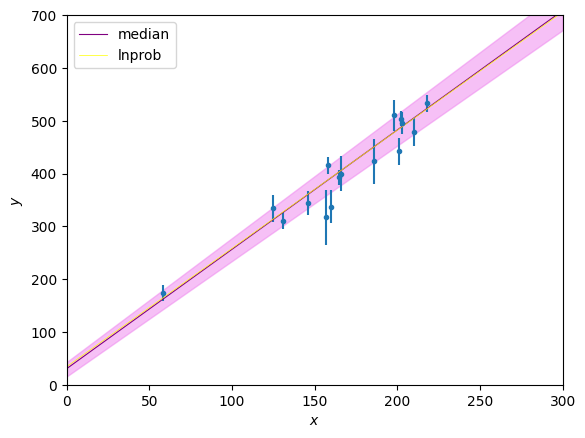

In [104]:
row, col = np.unravel_index(np.argmax(lnprob), lnprob.shape)

x = np.linspace(0, 300)
A = np.column_stack([np.ones_like(x), x])

B = samples[:,0]
M = samples[:,1]

y84 = y = A @ np.array([np.percentile(B, 84.), np.percentile(M, 84.)])
y16 = y = A @ np.array([np.percentile(B, 16.), np.percentile(M, 16.)])
plt.fill_between(x, y16, y84, color = 'violet', alpha = 0.5)

X = np.array([203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146], dtype = float)
Y = np.array([495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344], dtype = float)
sigma_Y = np.array([21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22], dtype = float)

# for i in np.random.randint(len(samples), size=500):
#   y = A @ np.array([samples[i,0], samples[i,1]])
#   plt.plot(x, y, color = 'violet', alpha = 0.01);

plt.errorbar(X, Y, yerr = sigma_Y, marker = ".", linestyle = "");
plt.xlabel("$x$"); plt.ylabel("$y$");
plt.xlim(0, 300);  plt.ylim(0, 700);

y = A @ np.array([np.percentile(B, 50.), np.percentile(M, 50.)])
plt.plot(x, y, color='purple', label="median", linewidth=0.8);

yprob = A @ np.array(chain[row, col])
plt.plot(x, yprob, color='yellow', label="lnprob",linewidth=0.5);

plt.legend();